**Table of contents**<a id='toc0_'></a>    
- 0. [Imports](#toc1_)    
- 1. [Basic Edgeworth box](#toc0_)   
  - 1.a [Finding pareto improvements](#toc0_)
  - 1.b [The set of pareto improvements in an Edgeworth box](#toc0_)  
- 2. [Market clearing error](#toc0_)
- 3. [Market clearing price](#toc0_)
- 4. [Utility maximization of consumer A](#toc0_)
  - 4.a [Allocation if only prices in P1 can be chosen](#toc0_)
  - 4.b [Allocation if any positive prices can be chosen](#toc0_)
- 5. [A is the market maker](#toc0_)
  - 5.a [Allocation restricted to C](#toc0_)
  - 5.b [Allocation if no further restrictions are imposed](#toc0_)
- 6. [Maximization of aggregate utility](#toc0_)
  - 6.a [Allocation when consumption is chosen by social planner](#toc0_)
  - 6.b [Illustrating results from question 3-5](#toc0_)
- 7. [Random set of endowments](#toc0_)
- 8. [Market equilibrium allocation with random set](#toc0_)
  - 8.a [Market equilibrium for each combination of endowments in set $W$](#toc0_)
  - 8.b [Plotting market equilibria in Edgeworth box](#toc0_)



<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 0. <a id='toc1_'></a>[Imports](#toc0_)

Imports and set magics:

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np

# We import autoreload modules to have the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

The model is set up by defining the utility functions for each consumer as well as the demand for each good for each consumer.

In [ ]:
# We import our model class as "model"
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

## 1. <a id='toc2_'></a>[Basic Edgeworth box](#toc0_)

In a basic Edgeworth box all pairs of combinations of $x_1^A$ and $x_2^A$ that leave both consumers at least as well off as when they are consuming their endowments are plottet. This is done by looping though the possible values of $x_1^A$ and $x_2^A$ and finding the pairs that causes the utility of consumer A and B to be strictly larger than their utility when consuming their endowments. 

### 1.a <a id='toc2_1_'></a>[Finding pareto improvements](#toc0_)

In [ ]:
#Find the pareto improvements relative to the endowment
result = model.find_pareto_improvements(N1=76, N2=76)

### 1.b <a id='toc2_1_'></a>[The set of pareto improvements in an Edgeworth box](#toc0_)

In [ ]:
#Plotting the pareto improvements in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in result:
    ax_A.scatter(x1A, x2A, marker='o', color='blue')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

## 2. <a id='toc2_'></a>[Market clearing error](#toc0_)

We calculate the error in the market clearing condition for the specified range of prices.

In [ ]:
# Define prices 
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)

# Calculate market clearing error for both markets
model.check_market_clearing(p1 = p1_values_array)

## 3. <a id='toc2_'></a>[Market clearing price](#toc0_)

We use Walras' law and find the market clearing price that causes the error in the market for good 1 to equal zero. 

In [ ]:
#Find the market clearing price
model.find_equilibrium(p_low = 0.93, p_high = 0.95)
model.demand_A(0.94)

## 4. <a id='toc2_'></a>[Utility maximization of consumer A](#toc0_)

### 4.a <a id='toc2_1_'></a>[Allocation if only prices in P1 can be chosen](#toc0_)

We find the optimal allocation for A where A chooses the price to maximize her own utility. A can choose between the list of prices P given in question 2.

In [121]:
model.Utility_max_a()

Best utility is 0.63361599 at p1 = 1.88666667
Optimal allocation for A is as follows, x1: 0.31967020 and x2: 1.20622222


(0.31967020023557124, 1.2062222222222225)

### 4.b <a id='toc2_1_'></a>[Allocation if any positive prices can be chosen](#toc0_)

Hereafter we find the optimal allocation for A where A can choose whatever price she wants.

In [ ]:
model.Utility_max_b()

## 5. <a id='toc2_'></a>[A is the market maker](#toc0_)

Now it is assumed that A is the market maker and thereby chooses B's consumption.

### 5.a <a id='toc2_1_'></a>[Allocation restricted to C](#toc0_)

We find the allocation where consumer A's utility is maximized under the restriction that the choice set is restricted to C. That is, we loop through the pareto improvements found in exercise 1 and finds the pair of $x_1^A$ and $x_2^A$ that maximizes the utility of consumer A.

In [127]:
#Find the allocation when the choice set is restricted to C
model.pareto_optimizer()

x1A = 0.7895
x2A = 0.3553
uA  = 0.4636


(0.7894736842105263, 0.35526315789473684, 0.4636027469805233)

### 5.b <a id='toc2_1_'></a>[Allocation if no further restrictions are imposed](#toc0_)

We find the allocation when consumer A is the market maker but B is not worse of than when consuming the initial endowment. This is done by maximizing the utility of consumer A under the constraint that the difference between B's utility when consuming the proposed amount compared to consuming the endowment has to be non-negative. 

In [128]:
#Find the allocation when there is no restriction but the fact that B has to be better of than when consuming the endowment
model.marketmaker_solver()

x1A = 0.5757
x2A = 0.8444
uA  = 0.7432


(0.5757450571871308, 0.8444377880991675, 0.7432276287140577)

## 6. <a id='toc2_'></a>[Maximization of aggregate utility](#toc0_)

### 6.a <a id='toc2_1_'></a>[Allocation when consumption is chosen by social planner](#toc0_)

The aggregate utility of consumer A and B is maximized such that the consumption levels are chosen by a utalitarian social planner.

In [123]:
#Find allocation when aggregate utility is maximized
model.socialplanner_solver()

x1A = 0.3334
x2A = 0.6668
uA  = 0.5293


(0.3334399256734374, 0.6668016053890844, 0.5292614854006306)

### 6.b <a id='toc2_1_'></a>[Illustrating results from question 3-5](#toc0_)

To compare results from question 3-5 we plot all the different optimal allocations

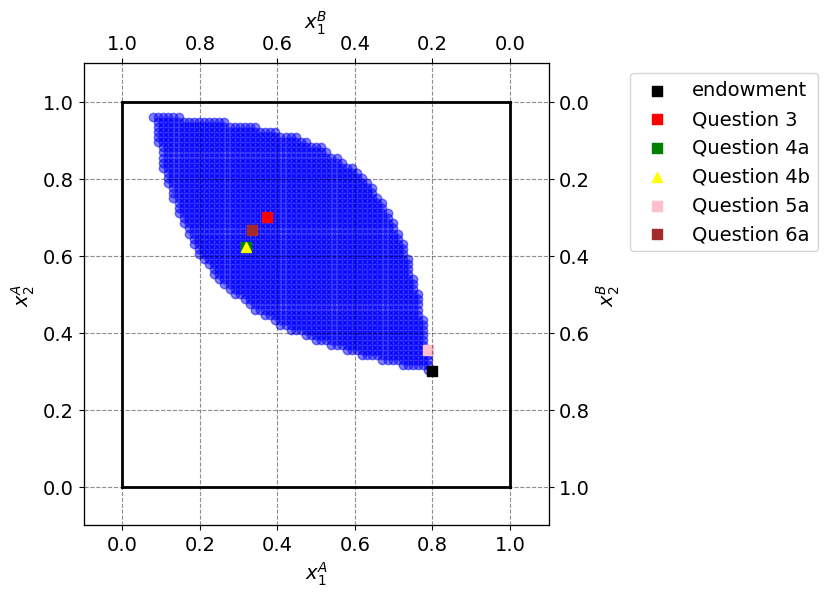

In [122]:
#Plotting the pareto improvements in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

xA1_3 = 0.37304964539007096
xA2_3 = 0.7013333333333335
xA1_4a = 0.31967020023557124  
xA2_4a = 0.62374239742934012
xA1_4b = 0.31924337537417485
xA2_4b = 0.62390182319491270
xA1_5a = 0.7894736842105263
xA2_5a = 0.35526315789473684 
xA1_6a = 0.3334399256734374
xA2_6a = 0.6668016053890844

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in result:
    ax_A.scatter(x1A, x2A, marker='o', color='blue', alpha=0.5)

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment', s=50)
ax_A.scatter(xA1_3, xA2_3, marker='s', color='red', label='Question 3', s=50)
ax_A.scatter(xA1_4a, xA2_4a, marker='s', color='green', label='Question 4a', s=50)
ax_A.scatter(xA1_4b, xA2_4b, marker='^', color='yellow', label='Question 4b', s=50)
ax_A.scatter(xA1_5a, xA2_5a, marker='s', color='pink', label='Question 5a', s=50)
ax_A.scatter(xA1_6a, xA2_6a, marker='s', color='brown', label='Question 6a', s=50)


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));




From the plot depicted above, it is evident that there is a significant difference in allocations when comparing the scenarios of maximizing Consumer A's utility with and without constraints. The price constraints in scenarios 4a and 4b did not markedly influence the outcome since the prices, and consequently the allocations yielding the highest utility, were nearly encompassed within the constrained list of prices PP. The most substantial deviation in allocation occurs when the choice set is limited to CC, as shown above. Here, Consumer A ends up with a considerable amount of good $x_1^A$ and less of $x_2^A$. Ultimately, we examine the scenario where aggregate utility is considered. We observe that the socially optimal allocation occurs when Consumer A possesses slightly more of both goods compared to optimizing on her own.

In general, the greatest utility is achieved when a utilitarian social planner is able to maximize the aggregate utility.

## 7. <a id='toc2_'></a>[Random set of endowments](#toc0_)

A random set of endowments is created by drawing 50 random $w_1^A$ and $w_2^A$ from a uniform distribution. 

In [ ]:
#Draw a set of endowments with 50 elements
model.setw(s1 = 50, s2 = 50)

### 8. <a id='toc2_1_'></a>[Market equilibrium allocation with random set](#toc0_)

A market equilibrium allocation is found for each pair of endowments in $W$ by finding the price within all positive prices that causes the error of clearing the market for good 1 to become zero for each endowment pair. 

### 8.a <a id='toc2_1_'></a>[Market equilibrium for each combination of endowments in set $W$](#toc0_)

In [ ]:
#Find market equilibria for each endowment combination
equilibria = []

for w1A, w2A in model.setw(s1=50, s2=50):
    allocation = model.find_equilibrium_wset(w1A, w2A)
    equilibria.append(allocation)

print(equilibria)

### 8.b <a id='toc2_1_'></a>[Plotting market equilibria in Edgeworth box](#toc0_)

In [ ]:
#Plotting the market equilibria in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in equilibria:
    ax_A.scatter(x1A, x2A, marker='o', color='blue')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])